# TTV model evaluation example

*Author: Hannu Parviainen*<br/>
*Last modified: 20.10.2020*

Evaluating the transit model for a planet whose transit center times deviate from a linear ephemeris is extremely simple in PyTransit. Each light curve (indexed by an array of light curve indices, `lcids`) can be given its own zero epoch by giving the model a set of per-light-curve epoch indices (`epids`), and then giving the zero epoch (`t0`) as an array rather than as a single float. Here is an example using the `RoadRunner` model, but the same approach will work with the `QuadraticModel` as well (and with the rest of the transit models a bit later).

**Note:** The first evaluation of the transit model takes a bit of time because numba compiles the code behind the scenes only when needed (and calling `TransitModel.evaluate` with different types of parameters calls actually a different numba routines). The model evaluation is extremely fast after all the required code has been compiled.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytransit import RoadRunnerModel

In [3]:
rc('figure', figsize=(13,4))

In [4]:
tm = RoadRunnerModel()

## Set up the model

First, we create the time, light curve index, and epoch index arrays. We model `ntr` consecutive transits, each with `npt` points.

In [5]:
ntr = 3
npt = 200

In [6]:
times = concatenate(linspace(-0.2, 0.2, npt)[newaxis,:] + arange(ntr)[:,newaxis])
lcids = repeat(arange(ntr), npt)
epids = arange(ntr)

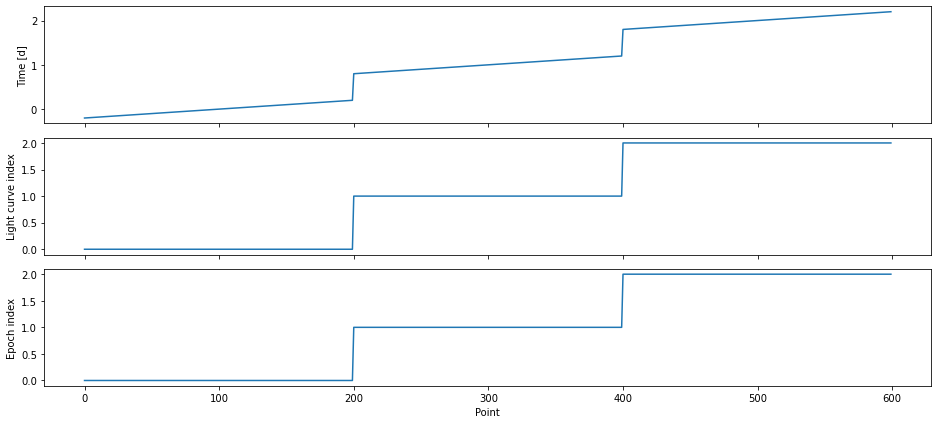

In [7]:
fig, axs = subplots(3, 1, figsize=(13,6), sharex='all')
axs[0].plot(times)
axs[1].plot(lcids)
axs[2].plot(epids[lcids])
setp(axs[0], ylabel='Time [d]')
setp(axs[1], ylabel='Light curve index')
setp(axs[2], ylabel='Epoch index', xlabel='Point')
fig.tight_layout()

## Model evaluation for a linear ephemeris

First, we check that everything works as it should when we assume that the orbit does not evolve over time.

In [8]:
tm.set_data(times, lcids=lcids)

In [9]:
flux = tm.evaluate(k=0.11, ldc=[0.23, 0.1], t0=1.0, p=1.0, a=4.0, i=0.5*pi)

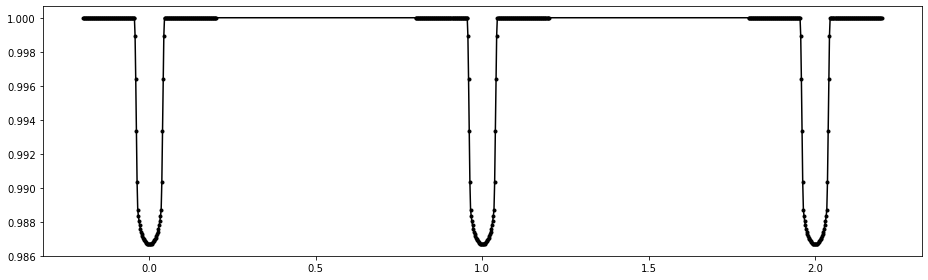

In [10]:
fig, ax = subplots()
ax.plot(times, flux, 'k.-')
fig.tight_layout()

## TTV model evaluation

Next, we give the `TransitModel.set_data` method the per-light-curve *epoch indices* (`epids`), and then a separate transit centre time in the model evaluation, one per light curve.

In [11]:
tm.set_data(times, lcids=lcids, epids=epids)

In [12]:
flux = tm.evaluate(k=0.11, ldc=[0.23, 0.1], t0=[1.0, 2.1, 2.9], p=1.0, a=4.0, i=0.5*pi)

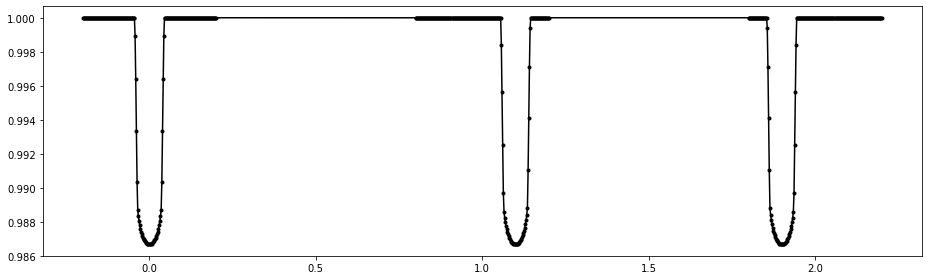

In [13]:
fig, ax = subplots()
ax.plot(times, flux, 'k.-')
fig.tight_layout()

As with all the PyTransit models, the TTV model can be evaluated for a set of parameter vectors in a single call.

In [14]:
npv = 10
ks = normal(0.1, 0.01, npv)
ldcs = tile([0.23, 0.1], [npv,1,1])
t0s = tile([1.0, 2.1, 2.9], [npv, 1])
t0s[:,1] += normal(0.0, 0.02, npv)
ps = full(npv, 1.0)
smas = full(npv, 4.0)
incs = full(npv, 0.5*pi)

In [15]:
flux = tm.evaluate(k=ks, ldc=ldcs, t0=t0s, p=ps, a=smas, i=incs)

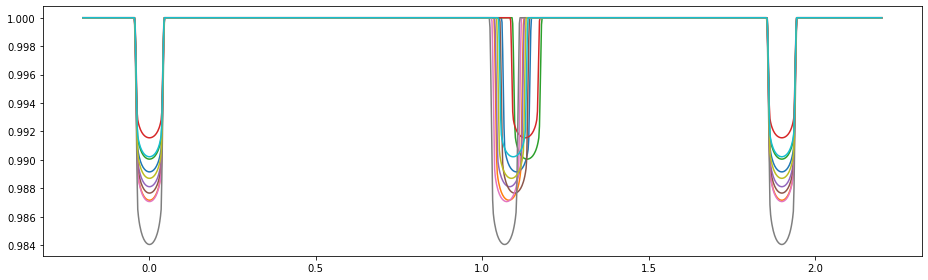

In [16]:
fig, ax = subplots()
ax.plot(times, flux.T, '-')
fig.tight_layout()

---

<center>© 2020 Hannu Parviainen</center>